# 预备知识_Preliminaries
## 数据操作
*本节总结：深度学习存储和操作数据的主要接口是张量，其功能包括基本数学运算、广播、索引、切片、内存节省和转换其他Python对象。*
### 创建
张量是由数值组成的数组，具有一个轴的张量对应数学上的 *向量*，具有两个轴的张量对应数学上的 *矩阵*。

In [1]:
import torch


x = torch.arange(12)  # arange创建向量，默认为整数
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [2]:
x.shape  # 形状
x.numel()  # 元素总数

12

In [3]:
X = x.reshape(3, 4)  # 改变形状
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [4]:
torch.zeros((2, 3, 4))  # 创建一个形状为（2,3,4）的张量，所有元素都设置为0
torch.ones((2, 3, 4))  # 创建一个形状为（2,3,4）的张量，所有元素都设置为1

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [5]:
torch.randn(3, 4)  # 每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样。
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])  # 从0开始

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 运算符
简单的元素运算如下：

In [6]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **是求幂运算
torch.exp(x)  # 求幂

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [7]:
# 连结张量
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
(torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1))  # 0为按行拼接，1为按列拼接

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

### 广播机制
即使形状不同，仍可以通过 ** 广播机制 ** 来执行按元素操作。例如：

In [8]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [9]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 索引和切片

In [10]:
X[-1], X[1:3]  # 第一个元素的索引是0，-1为最后一个元素，1:3为第二个和第3个元素（左闭右开）

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [11]:
X[1, 2] = 9  # 更改元素
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [12]:
X[0:2, :] = 12  # 访问第一行和第二行的所有元素，并赋值为12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 节省内存
浅拷贝和深拷贝？
一般采用 ** X[:] = X + Y ** 或 ** X += Y ** 来减少操作的开销

### 转换为其他python对象
张量和NumPy张量相互转换

In [13]:
import torch

A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

将张量转换为Python标量，可以调用item函数或Python的内置函数

In [14]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 数据预处理
上一节中主要介绍了深度学习主要针对的数据对象类型及操作，这一节介绍如何将数据导入并简单处理。

*本节总结：用pandas处理缺失的数据时，可根据情况选择用插值法和删除。*

In [15]:
### 读取数据集

In [16]:
import os
import pandas as pd

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'test1.csv')  # 创建数据集，并存储在test1.csv文件
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 数据
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 处理缺失值
插值法或删除

In [17]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean(numeric_only=True))  # 用纯数字元素的均值替换空缺值
print(inputs)
inputs = pd.get_dummies(inputs, dummy_na=True)  # 转换，分类为True和False
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN
   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### 转换为张量格式
将数据转换为张量格式

In [18]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))  # 转换为张量
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 线性代数
简单记录一下。


$x$、$y$和$z$：标量变量，仅包含一个数值 * torch.tensor(3.0) *

$\mathbb
{R}$：所有实数标量的空间 - 实数集合

$\mathbf
{x}$、$\mathbf
{y}$和$\mathbf
{z})$：向量，标量值组成的列表 * torch.arange(4) *

$\mathbf
{X}$、$\mathbf
{X} \ in  \mathbb
{R} ^ {m \times
n}$：矩阵，具有两个轴的张量 * torch.arange(20).reshape(5, 4) *

$\mathbf
{a} ^\top$：转置 *A.T*

           张量：具有任意数量轴的$n$维数组的通用方法，向量是一阶张量，矩阵是二阶张量

矩阵和矩阵的运算，两个矩阵的按元素乘法被称为他们的Hadamard积。

求和：sum(axis=0)
对每一列进行求和，sum(axis=1)
对每一行进行求和，sum(axis=[0, 1]) = sum()
整个矩阵求和

均值：A.mean(), A.sum() / A.numel()

两个向量相乘为点积，矩阵 - 向量积，矩阵 - 矩阵(m * n，n * k --> m * k)


## 范数
L2范数：$$\ | \mathbf
{x}\ | _2 = \sqrt
{\sum_
{i = 1} ^ n
x_i ^ 2}, $$

In [19]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

L1范数：$$\ | \mathbf{x}\ | _1 = \sum_{i=1} ^ n \left | x_i \right |.$$

torch.abs(u).sum()

Frobenius范数：
$$\ | \mathbf{X}\ | _F = \sqrt{\sum_{i=1} ^ m \sum_{j=1} ^ n x_{ij} ^ 2}.$$

In [20]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 微积分
* 本节小结：微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。链式法则可以用来微分复合函数。*

### 导数和微分
具体实例：

In [21]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l  # 一定要用0.17.5版本的d2l，更高版本因为更新的原因会报错

def f(x):
    return 3 * x ** 2 - 4 * x

In [22]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [23]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [24]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [25]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [26]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

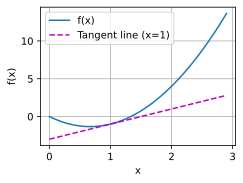

In [27]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

微分的定义

梯度

链式法则求解多元函数微分

### 自动求导
*本节小结：这一节再多看几遍*

计算图：将代码分解成操作子；将计算表示为一个无环图

自动求导的两种模式：正向积累和反向积累

链式法则 $$\frac
{dy}
{dx} = \frac
{dy}
{du} \frac
{du}
{dx}.$$

下面对函数$y = 2\mathbf
{x} ^ {\top}\mathbf
{x}$关于列向量$\mathbf
{x}$求导：

In [28]:
import torch

x = torch.arange(4.0, requires_grad=True)  # 在x里面存储梯度
x.grad  # 默认为None
y = 2 * torch.dot(x, x)
y.backward()  # 反向传播
x.grad
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值 x.grad.zero_()
# 在绝大多数情况下，很少对向量进行求导，都是对标量。y.sum().backward()
# u = y.detach() 把u看作是一个关于y的常量
# 还可以利用Python控制流（例如，条件、循环或任意函数调用），来计算导数

tensor([ 0.,  4.,  8., 12.])